<a href="https://colab.research.google.com/github/wrodemoyer/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**



- **Author:** William Rodemoyer

## Project Overview

## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load and Inspect Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/sales_predictions.csv')


### .head()

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### .info()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

In [13]:
# Identifying how many rows and columns.
df.shape 

(8523, 12)

The dataframe has 8523 rows, and 12 columns.

In [14]:
# Identifying each variables datatype.
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [15]:
# Checking for duplicates.
df.duplicated().sum()

0

There are ***Zero*** duplicates. 

In [16]:
# Identifying any missing values.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

'Item_Weight' has 1463 missing values, and 'Outlet_Size' has 2410 missing values.

In [17]:
# Finding the percentage of missing values in each column.
print(df.isna().sum()/len(df)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [18]:
# Resolving the missing values in column 'Item_Weight' 
median_weight = df['Item_Weight'].median()

In [19]:
df['Item_Weight'].fillna( value = median_weight, inplace= True)

I decided to Impute missing values using the 'median' value of the column because this is less affected by outliers than using the 'mean'. 

In [20]:
# Resolving the missing values in column 'Outlet_Size'
df['Outlet_Size'].fillna( value = 'Unknown', inplace= True)

I decided to replace missing values with the value 'Unknown' because this typically will not create bias in favor of a specific label or class.

In [21]:
# Confirming that all missing values were dealt with.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

There are now ***Zero*** missing values. 

In [22]:
# Looking for inconsistent categories of data 
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
# Fixing the categories of data that have inconsistencies.
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

There are no longer any inconsistencies.

In [24]:
# Retrieving the min, max, & mean of any numeric column.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


Min, Max, and Mean for each Numerical Column.

---
'Item_Weight'

*   min: 4.55500
*   max: 21.35000	
*   mean: 12.81342	


'Item_Visibility'

*   min:  0.000000
*   max:  0.328391	
*   mean: 0.066132

'Item_MRP'
*   min: 31.290000	
*   max:  266.888400	
*   mean: 140.992782	

'Outlet_Establishment_Year'


*   min: 1985.000000	
*   max: 2009.000000	
*   mean: 1997.831867	

'Item_Outlet_Sales'
*   min: 33.290000
*   max: 13086.964800
*   mean: 2181.288914













## Exploratory Data Analysis

In [25]:
# Checking our info again
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Bar Plots

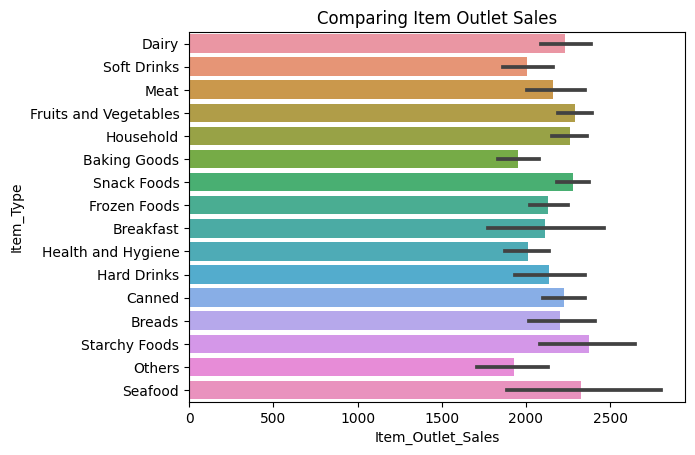

In [26]:
# Comparing the Item Outlet Sales by each Item Type
ax= sns.barplot(data= df, x= 'Item_Outlet_Sales', y= 'Item_Type')
ax.set_title('Comparing Item Outlet Sales');

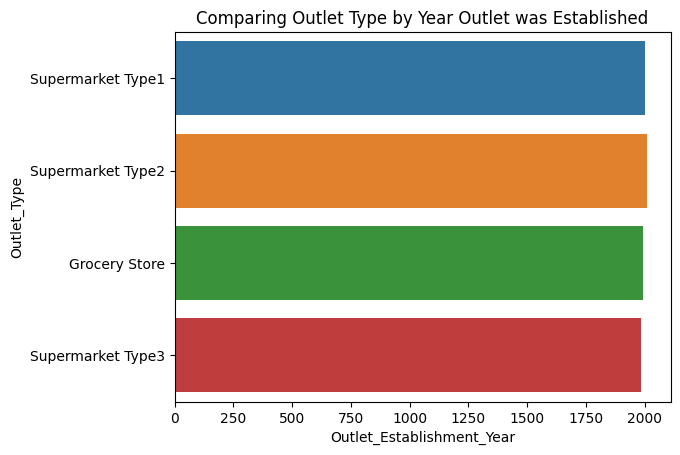

In [43]:
ax= sns.barplot(data=df, x= 'Outlet_Establishment_Year', y= 'Outlet_Type')
ax.set_title('Comparing Outlet Type by Year Outlet was Established');

### Histograms

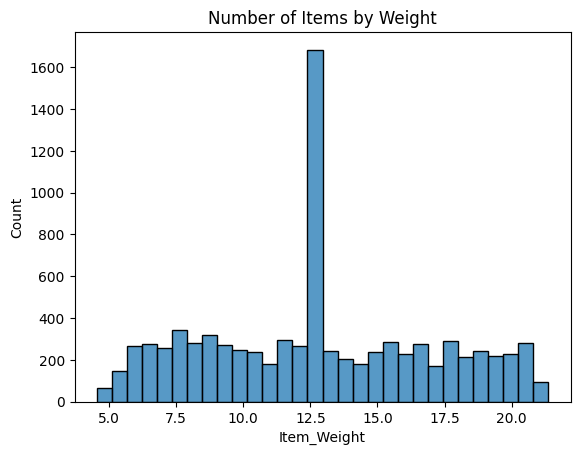

In [40]:
ax = sns.histplot(data= df,
                  x= 'Item_Weight',
                  bins= 30)
ax.set_title('Number of Items by Weight');

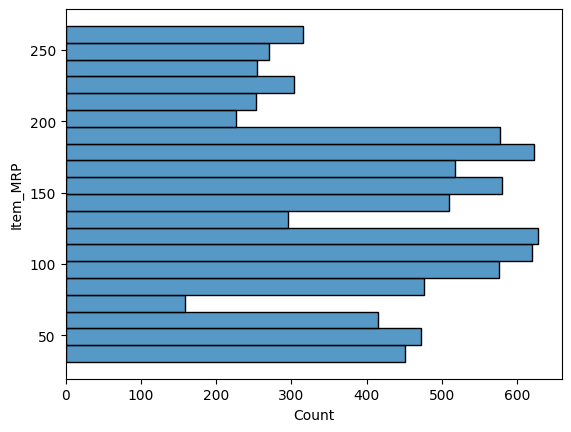

In [41]:
ax = sns.histplot(data=df,
                  y= 'Item_MRP',
                  bins= 20);

### Boxplots

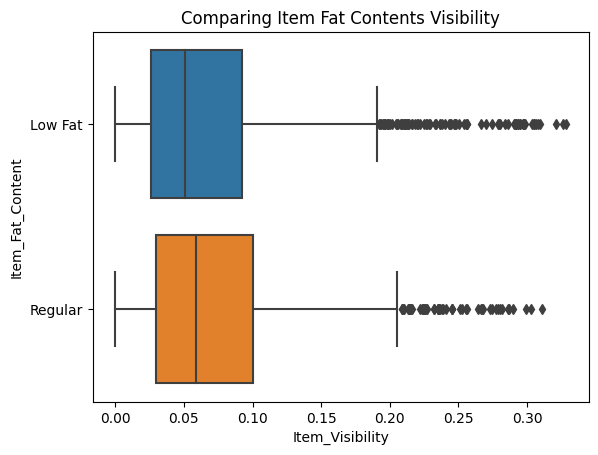

In [29]:
# Comparing the Visibility of Regular vs. Low Fat Content Items using a Boxplot
ax = sns.boxplot(x= 'Item_Visibility', y= 'Item_Fat_Content', data=df)
ax.set_title('Comparing Item Fat Contents Visibility');

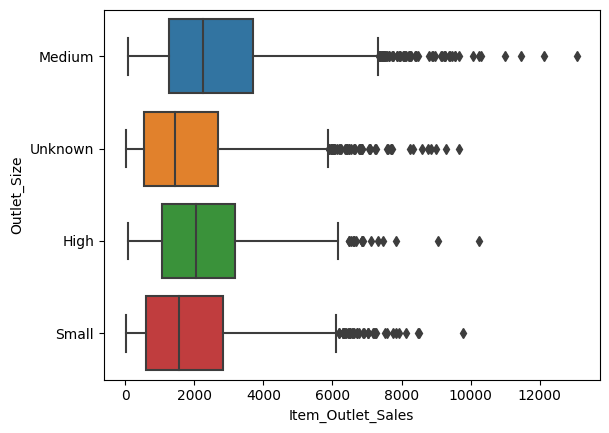

In [38]:
# Comparing the 'Item_Outlet_Sales' by the Outlets size.
ax = sns.boxplot(x= 'Item_Outlet_Sales', y= 'Outlet_Size', data=df)

### Heatmaps

<ipython-input-35-032c3a707770>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap= 'Blues', annot= True);


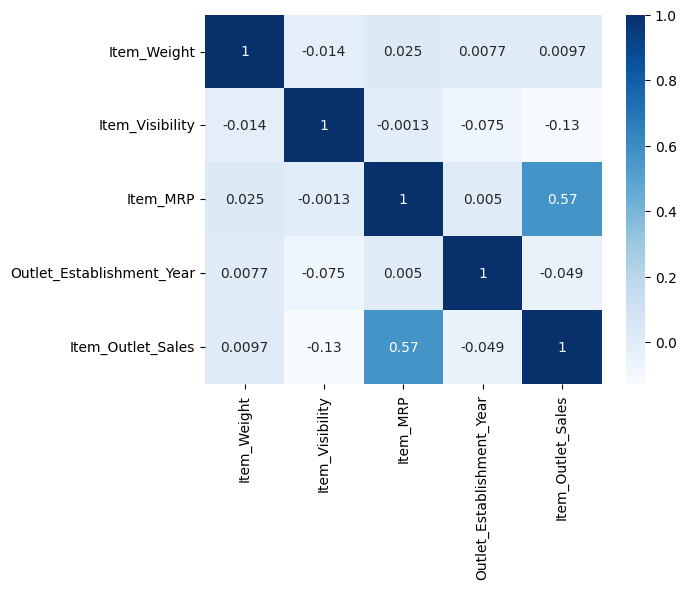

In [35]:
sns.heatmap(df.corr(), cmap= 'Blues', annot= True);

## Explanatory Data Analysis